<center><h1>Data Science</h1>
<h2>Aplicado a base de dados de embarcações</h2></center>

---
<h3>Introdução</h3>

<p1>Neste projeto introdutório sobre Data Science, devemos analisar um Data Frame e 
apresentar previsões de Preço de embarcações, entendendo as principais correlações entre os atributos dos veículos vendidos e modelando sistema de aprendizagem de máquina.

Para isso, foi realizado passo a passo das metodologias de criação para um modelo de análise, além da utilização de técnicas simples em ciência de dados, como a revisão de problema de negócio, entendimento do negócio, análise exploratória e afins.</p1>

In [ ]:
# Passo a Passo

# Passo 1: Entendimento do negócio;

# Passo 2: Entendimento do ambiente organizacional;


In [2]:
# Passo 3: Extração/Obtenção de dados;
import pandas as pd

tabela = pd.read_csv('barcos_ref.csv')
display(tabela)


,Preco,TipoBarco,TipoVenda,Ano,Comprimento,Largura,Material
0,3490,1,1,2020,4.00,1.50,1
1,3399,2,1,2019,3.55,1.46,2
2,3600,3,2,1999,6.20,2.38,2
3,3500,2,2,1987,4.35,1.75,3
4,3500,4,2,2004,4.70,2.00,3
...,...,...,...,...,...,...,...
7644,5000,7,2,1974,7.20,2.70,3
7645,4999,4,2,1980,6.00,2.10,3
7646,4950,2,2,1984,6.00,1.62,5
7647,4499,4,1,2020,4.40,1.80,3


In [7]:
# Passo 4: Data Clean (Tratamento dos dados);
tabela.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7649 entries, 0 to 7648
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Preco        7649 non-null   int64  
 1   TipoBarco    7649 non-null   int64  
 2   TipoVenda    7649 non-null   int64  
 3   Ano          7649 non-null   int64  
 4   Comprimento  7649 non-null   float64
 5   Largura      7649 non-null   float64
 6   Material     7649 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 418.4 KB


,Preco
Preco,1.000000
TipoBarco,0.293137
TipoVenda,0.041266
Ano,0.113385
Comprimento,0.578353
Largura,0.557621
Material,-0.036476


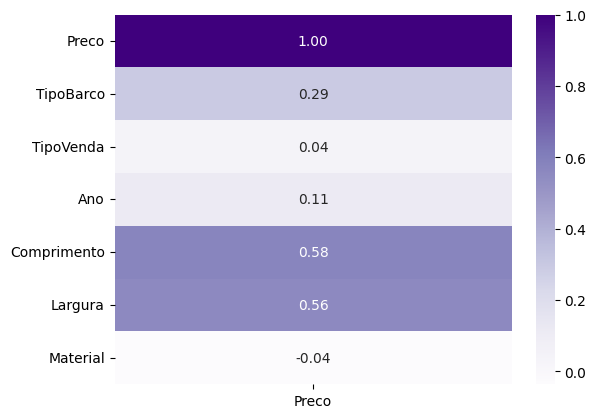

In [29]:
# Passo 5: Exploratory Analisys (Análise exploratória);
import seaborn as sns
import matplotlib.pyplot as plt

display(tabela.corr()[['Preco']])
sns.heatmap(data=tabela.corr()[['Preco']], cmap="Purples", annot = True, fmt='.2f')
plt.show()

In [39]:
# Passo 6: Modelagem dos algorítmos de machine learning;
# Dividir DataFrame em matriz X e Y
y = pd.DataFrame()
y = tabela['Preco']

x = pd.DataFrame()
x = tabela.drop(['Preco'], axis=1)
print(x)
print(y)
# Preparar tabelas testes e treinos:
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.35)

#Preparar modelo
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

modelo_RL = LinearRegression()
modelo_AD = RandomForestRegressor()

modelo_RL.fit(x_treino, y_treino)
modelo_AD.fit(x_treino, y_treino)

      TipoBarco  TipoVenda   Ano  Comprimento  Largura  Material
0             1          1  2020         4.00     1.50         1
1             2          1  2019         3.55     1.46         2
2             3          2  1999         6.20     2.38         2
3             2          2  1987         4.35     1.75         3
4             4          2  2004         4.70     2.00         3
...         ...        ...   ...          ...      ...       ...
7644          7          2  1974         7.20     2.70         3
7645          4          2  1980         6.00     2.10         3
7646          2          2  1984         6.00     1.62         5
7647          4          1  2020         4.40     1.80         3
7648          2          1  2019         3.60     1.60         3

[7649 rows x 6 columns]
0       3490
1       3399
2       3600
3       3500
4       3500
        ... 
7644    5000
7645    4999
7646    4950
7647    4499
7648    3780
Name: Preco, Length: 7649, dtype: int64


RandomForestRegressor()

<Axes: >

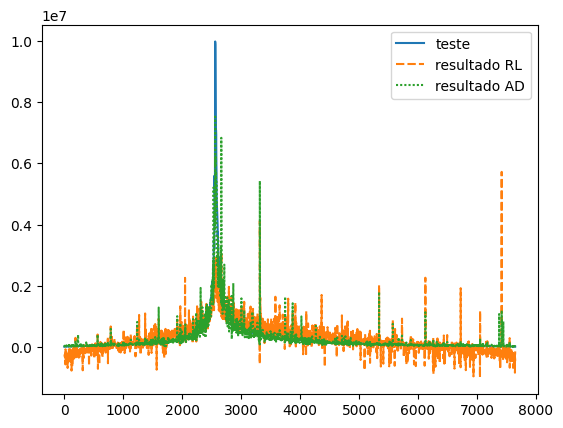

In [58]:
# Passo 7: Interpretação dos resultados.
previsao_modelo_RL = modelo_RL.predict(x_teste)
previsao_modelo_AD = modelo_AD.predict (x_teste)

tabela_comp = pd.DataFrame()
tabela_comp['teste'] = y_teste
tabela_comp['resultado RL'] = previsao_modelo_RL
tabela_comp['resultado AD'] = previsao_modelo_AD
sns.lineplot(data=tabela_comp)

In [76]:
from sklearn.metrics import r2_score

print(f'A acurácia do modelo de Regressão Linear (R.L.) é de {r2_score(y_teste, previsao_modelo_RL):,.2%}.')
print(f'Já a acurácia do modelo de Àrvore de Decisões (A.D.) foi de {r2_score(y_teste, previsao_modelo_AD):,.2%}.')


A acurácia do modelo de Regressão Linear é de 41.94%.
Já a acurácia do modelo de Àrvore de Decisões foi de 83.46%.
